In [1]:
import os
import sys
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

project_root = os.path.abspath(os.path.join(os.getcwd() , '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

load_cord = f"{project_root}/data/coordinates/processed_ger_vs_sp_coordinates.csv"

processed_cords_file = pd.read_csv(load_cord) 

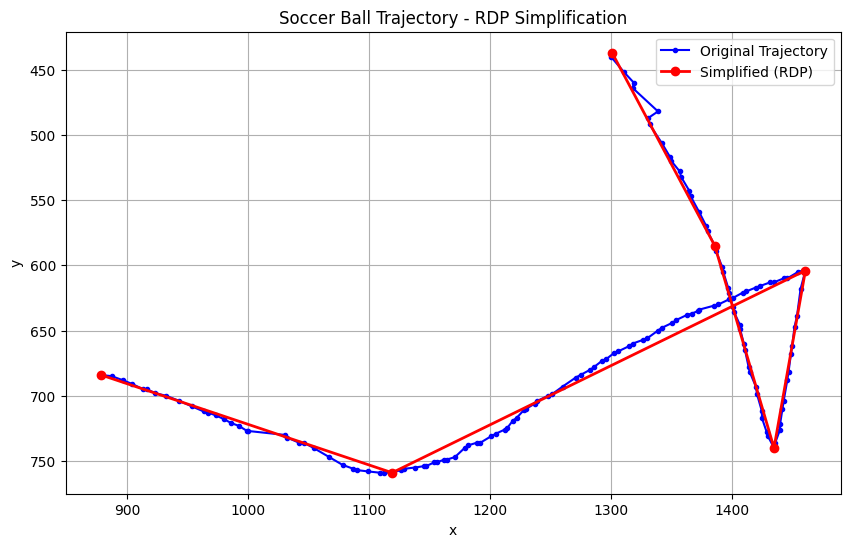

In [2]:
from rdp import rdp

points = processed_cords_file[['x', 'y']].values

simplified = rdp(points, epsilon=15)

# Plot the original and simplified trajectory
plt.figure(figsize=(10, 6))
plt.plot(points[:, 0], points[:, 1], 'b.-', label='Original Trajectory')
plt.plot(*zip(*simplified), 'ro-', label='Simplified (RDP)', linewidth=2)
plt.legend()
plt.title('Soccer Ball Trajectory - RDP Simplification')

# IMPORTAT: spiegelt auf X-Achse
plt.gca().invert_yaxis()

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

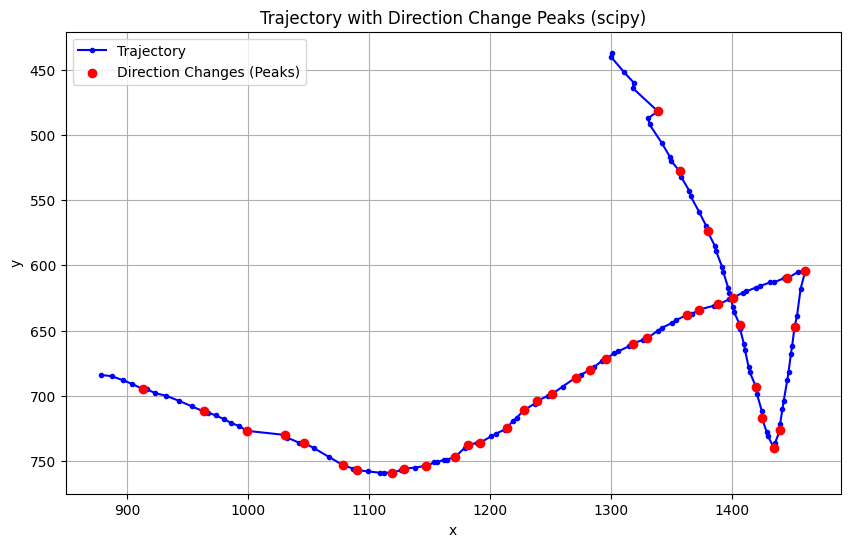

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

points = processed_cords_file[['x', 'y']].values

# Calculate angles between consecutive vectors
def angle_between(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_u, v2_u)
    return np.arccos(np.clip(dot, -1.0, 1.0))  # radians

angles = []
for i in range(1, len(points) - 1):
    v1 = points[i] - points[i - 1]
    v2 = points[i + 1] - points[i]
    angle = angle_between(v1, v2)
    angles.append(angle)

# Use scipy to find peaks in angle values (sharpest turns)
peaks, _ = find_peaks(angles, height=0.1)  # adjust height threshold as needed

# Align peaks with original point indices
peak_indices = [i + 1 for i in peaks]  # because angle was computed from i-1 to i+1

# Plot full trajectory
plt.figure(figsize=(10, 6))
plt.plot(points[:, 0], points[:, 1], 'b.-', label='Trajectory')
plt.scatter(points[peak_indices, 0], points[peak_indices, 1], color='red', label='Direction Changes (Peaks)', zorder=5)
plt.gca().invert_yaxis()
plt.title('Trajectory with Direction Change Peaks (scipy)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
